In [165]:
# -*- coding: utf-8 -*-
#!pip install pandas
#!pip install pandas-profiling

In [12]:
#Import necessary packages
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import sklearn
import scipy
import numpy as np

In [2]:
#定义excel表格的存储路径 在window系统上是反斜杠 mac系统上是顺斜杠
path = '/Users/HongX/Desktop/基金经理业绩表现_修改版.xlsx'

In [3]:
#用pandas读取excel到dataframe， 名称可以自己定义
manager_df = pd.read_excel(path)

#读取manager_df的excel前2行
manager_df.head(2)

,1基金经理,2在管基金类型,3今年以来总回报(%),4今年以来同类排名,5最近一月总回报(%),6最近三月总回报(%),7最近六月总回报(%),8最近一年总回报(%),9最近一年同类排名,10最近两年总回报(%),11最近两年同类排名,12最近三年总回报(%),13最近三年同类排名,14几何任职年化回报(%),15累计任职年限(年),16自然任职年限(年),17基金公司
0,刘格菘,普通股票型基金,14.717174,18.0,-13.017321,12.613065,43.389586,74.549703,1.0,NaN,NaN,NaN,NaN,2.926255,26.830137,5.969863,广发基金管理有限公司
1,许炎,普通股票型基金,19.577762,6.0,-12.076995,16.200506,39.210224,69.953991,2.0,NaN,NaN,NaN,NaN,14.213978,3.989041,3.608219,富国基金管理有限公司


In [15]:
for col in manager_df.columns: 
    print(col) 

1基金经理
2在管基金类型
3今年以来总回报(%)
4今年以来同类排名
5最近一月总回报(%)
6最近三月总回报(%)
7最近六月总回报(%)
8最近一年总回报(%)
9最近一年同类排名
10最近两年总回报(%)
11最近两年同类排名
12最近三年总回报(%)
13最近三年同类排名
14几何任职年化回报(%)
15累计任职年限(年)
16自然任职年限(年)
17基金公司


In [5]:
#按excel里的基金公司给所有基金经理分组，然后求回报率和任职年限的平均值，并显示前5个数
groupedByCompany = manager_df.groupby([r'17基金公司']).mean()
groupedByCompany.head(5)

,3今年以来总回报(%),4今年以来同类排名,5最近一月总回报(%),6最近三月总回报(%),7最近六月总回报(%),8最近一年总回报(%),9最近一年同类排名,10最近两年总回报(%),12最近三年总回报(%),13最近三年同类排名,14几何任职年化回报(%),15累计任职年限(年),16自然任职年限(年)
17基金公司,,,,,,,,,,,,,
万家基金管理有限公司,-0.147963,150.000,-13.056836,-2.299683,11.964776,14.672244,114.0,37.046005,NaN,NaN,2.061578,20.287671,4.405479
上投摩根基金管理有限公司,4.961704,99.375,-7.236790,3.448067,17.413893,29.022409,47.6,15.490405,30.417649,47.25,4.680528,13.006849,4.146575
东吴基金管理有限公司,7.758144,45.000,-11.184259,5.549911,10.847953,1.531549,195.0,7.184275,NaN,NaN,7.939145,15.845205,4.867123
中信保诚基金管理有限公司,-6.304671,249.000,-7.578348,-7.321851,2.334385,4.732036,175.0,8.838190,NaN,NaN,0.208024,61.106849,4.087671
中庚基金管理有限公司,3.014584,96.000,-8.262878,1.172739,8.796775,5.250000,170.0,NaN,NaN,NaN,0.324431,15.797260,4.904110


In [6]:
#按照累计任职年限降序排列，可以看出中信保诚基金管理有限公司的基金经理的平均累计任职年限最高
sortedGroup = groupedByCompany.sort_values(by=[r'15累计任职年限(年)'], ascending=False)
sortedGroup.head(5)

,3今年以来总回报(%),4今年以来同类排名,5最近一月总回报(%),6最近三月总回报(%),7最近六月总回报(%),8最近一年总回报(%),9最近一年同类排名,10最近两年总回报(%),12最近三年总回报(%),13最近三年同类排名,14几何任职年化回报(%),15累计任职年限(年),16自然任职年限(年)
17基金公司,,,,,,,,,,,,,
中信保诚基金管理有限公司,-6.304671,249.000000,-7.578348,-7.321851,2.334385,4.732036,175.0,8.838190,NaN,NaN,0.208024,61.106849,4.087671
长盛基金管理有限公司,5.973536,112.000000,-4.733610,5.601366,11.866618,3.772706,184.0,NaN,NaN,NaN,0.961673,47.134247,7.272603
国投瑞银基金管理有限公司,0.746965,131.000000,-6.822107,-0.369344,10.780287,12.513034,122.0,6.831683,NaN,NaN,0.190398,39.972603,5.331507
长城基金管理有限公司,0.315714,138.000000,-4.800465,-0.385167,11.365912,NaN,NaN,NaN,NaN,NaN,-0.000661,33.619178,4.221918
申万菱信基金管理有限公司,2.777299,109.333333,-9.385643,0.524614,17.815482,21.248006,115.0,-1.305720,NaN,NaN,12.923312,30.952511,3.448402


In [7]:
#取出manager_df的excel其中一列值画图

returnThisYear = manager_df[r'3今年以来总回报(%)']
return1Month = manager_df[r'5最近一月总回报(%)']
return3Month = manager_df[r'6最近三月总回报(%)']
return6Month = manager_df[r'7最近六月总回报(%)']
return1Year = manager_df[r'8最近一年总回报(%)']
return2Year = manager_df[r'10最近两年总回报(%)']
return3Year = manager_df[r'12最近三年总回报(%)']
returnTenureYearly = manager_df[r'14几何任职年化回报(%)']
cumTenureYear = manager_df[r'15累计任职年限(年)']
normTenureYear = manager_df[r'16自然任职年限(年)']

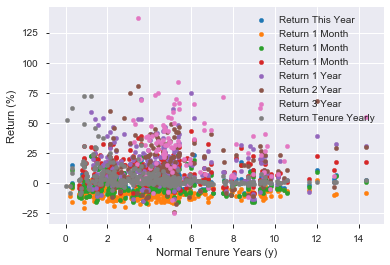

In [8]:
#给其中两个或者N个画散点图 X 和 Y plt.scatter(X, Y)
plt.figure()

plt.scatter(normTenureYear, returnThisYear, s=20, label='Return This Year')
plt.scatter(normTenureYear, return1Month, s=20, label='Return 1 Month')
plt.scatter(normTenureYear, return3Month, s=20, label='Return 1 Month')
plt.scatter(normTenureYear, return6Month, s=20, label='Return 1 Month')
plt.scatter(normTenureYear, return1Year, s=20, label='Return 1 Year')
plt.scatter(normTenureYear, return2Year, s=20, label='Return 2 Year')
plt.scatter(normTenureYear, return3Year, s=20, label='Return 3 Year')
plt.scatter(normTenureYear, returnTenureYearly, s=20, label='Return Tenure Yearly')

plt.xlabel('Normal Tenure Years (y)')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

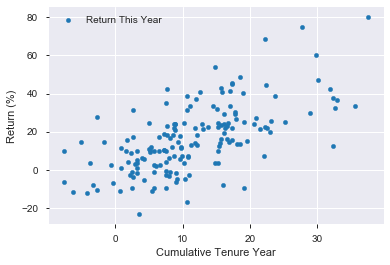

In [9]:
#最近6个月总回报(%) vs 最近两年总回报(%)， 看起来很相关
plt.figure()

plt.scatter(return6Month, return2Year, s=20, label='Return This Year')
plt.xlabel('Cumulative Tenure Year')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

In [13]:
#Linear regression of 2 variables
#最近6个月总回报(%) vs 最近两年总回报(%)
my_x = np.array(return6Month)
my_y = np.array(return2Year)
 
xm = np.ma.masked_array(my_x,mask=np.isnan(my_y)).compressed() #去掉一些NaN的值，在进行线性回归计算之前
ym = np.ma.masked_array(my_y,mask=np.isnan(my_y)).compressed() #去掉一些NaN的值，在进行线性回归计算之前

#R是线性相关系数
R=scipy.stats.linregress(xm, ym)

print(R)  #最近6个月总回报(%) vs 最近两年总回报(%) 相关系数是0.63， 算有点相关吧

LinregressResult(slope=1.2705002425901537, intercept=1.8201563715336935, rvalue=0.6376242013773952, pvalue=4.279683901602273e-20, stderr=0.12059773997650093)


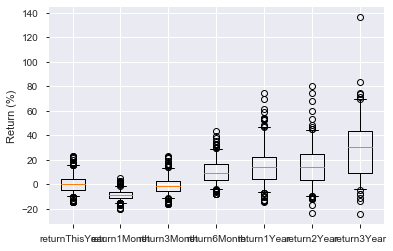

In [14]:
#去掉一些NaN的值，在进行画图之前
returnThisYear = np.ma.masked_array(returnThisYear,mask=np.isnan(returnThisYear)).compressed()
return1Month = np.ma.masked_array(return1Month,mask=np.isnan(return1Month)).compressed() 
return3Month = np.ma.masked_array(return3Month,mask=np.isnan(return3Month)).compressed() 
return6Month = np.ma.masked_array(return6Month,mask=np.isnan(return6Month)).compressed() 
return1Year = np.ma.masked_array(return1Year,mask=np.isnan(return1Year)).compressed() 
return2Year = np.ma.masked_array(return2Year,mask=np.isnan(return2Year)).compressed() 
return3Year = np.ma.masked_array(return3Year,mask=np.isnan(return3Year)).compressed() 

#把这些值放入一个字典里
my_dict = {'returnThisYear': returnThisYear, 'return1Month': return1Month, 'return3Month': return3Month, 'return6Month': return6Month, 'return1Year': return1Year, 'return2Year': return2Year, 'return3Year': return3Year}

#画个箱形图
fig = plt.figure()  # 创建画布
ax = plt.subplot()  # 创建作图区域
ax.boxplot(my_dict.values(), whis=[5, 95])   # 设置最大值不超过95分位点；最小值不小于5%分位点。
ax.set_xticklabels(my_dict.keys())
ax.set_ylabel('Return (%)')

plt.show()

In [208]:
#Overview of the Excel Sheet Data
import pandas_profiling
manager_df.profile_report(title='Fund Manager Statistics')

In [1]:
a = 3
b = 4
I = a > b
I

False